In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# 클러스터링

In [192]:
df = pd.read_csv('C:/Users/user/Desktop/데분/df.csv')

In [195]:
# 숫자열에 대해 콤마 제거 및 정수로 변환
columns_to_process = df.columns[1:3]  # 첫 번째 열,두번째열

for column in columns_to_process:
    df[column] = df[column].apply(lambda x: int(str(x).replace(',', '')))

df.fillna(0, inplace = True) #고성과 양양 병원급 X

In [193]:
df.columns #사업체수, 초등학교수 인구수로 나눠야댐

Index(['행정구역', '2023년06월_거주자 인구수', '2023년06월_세대수', '2023년06월_세대당 인구',
       '전입인구(2022.1~2023.5)', '전출인구(2022.1~2023.5)', '2020_사업체수', '2021_사업체수',
       '2020_인구천명당_의료기관병상수', '2021_인구천명당_의료기관병상수', '2020_인구십만명당_문화기반시설수',
       '2021_인구십만명당_문화기반시설수', '2021_인구천명당_사설학원수', '2022_인구천명당_사설학원수',
       '2022_초등학교수', '2023_초등학교수', '2021_주택수', '2022_주택수', '지방소멸위험도',
       '2021출산율', '2022출산율'],
      dtype='object')

In [202]:
x = df['2023년06월_거주자 인구수']

df['2020_사업체수'] = df['2020_사업체수'] * 10000/x
df['2021_사업체수'] = df['2021_사업체수'] * 10000/x
df['2022_초등학교수'] = df['2022_초등학교수'] * 10000/x
df['2023_초등학교수'] = df['2023_초등학교수'] * 10000/x

df.rename(columns = {'2020_사업체수':'인구만명당_2020_사업체수',
                     '2021_사업체수':'인구만명당_2021_사업체수',
                     '2022_초등학교수':'인구만명당_2022_초등학교수',
                     '2023_초등학교수':'인구만명당_2023_초등학교수'}, inplace = True)

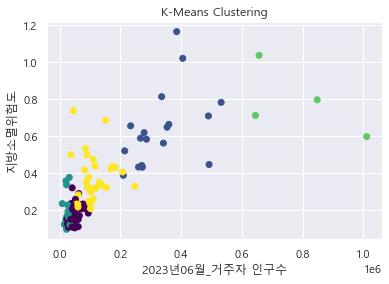

In [203]:
numeric_df = df.iloc[:, 1:]

# 데이터 정규화 (Standardization)
scaler = StandardScaler()
normalized_df = scaler.fit_transform(numeric_df)

# K-Means 클러스터링 모델 생성 및 학습
n_clusters = 5  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(normalized_df)

# 클러스터 레이블 가져오기
cluster_labels = kmeans.labels_

# 클러스터링 결과 시각화
df['Cluster'] = cluster_labels  # 클러스터 레이블을 데이터프레임에 추가

plt.scatter(df['2023년06월_거주자 인구수'], df['지방소멸위험도'], c=df['Cluster'], cmap='viridis')
plt.xlabel('2023년06월_거주자 인구수')
plt.ylabel('지방소멸위험도')
plt.title('K-Means Clustering')
plt.show()

# PCA하고 해보자

In [204]:
from sklearn.decomposition import PCA

In [214]:
df = pd.read_csv('C:/Users/user/Desktop/데분/df.csv')

In [215]:
# 숫자열에 대해 콤마 제거 및 정수로 변환
columns_to_process = df.columns[1:3]  # 첫 번째 열,두번째열

for column in columns_to_process:
    df[column] = df[column].apply(lambda x: int(str(x).replace(',', '')))

df.fillna(0, inplace = True) #고성과 양양 병원급 X

In [216]:
x = df['2023년06월_거주자 인구수']

df['2020_사업체수'] = df['2020_사업체수'] * 10000/x
df['2021_사업체수'] = df['2021_사업체수'] * 10000/x
df['2022_초등학교수'] = df['2022_초등학교수'] * 10000/x
df['2023_초등학교수'] = df['2023_초등학교수'] * 10000/x

df.rename(columns = {'2020_사업체수':'인구만명당_2020_사업체수',
                     '2021_사업체수':'인구만명당_2021_사업체수',
                     '2022_초등학교수':'인구만명당_2022_초등학교수',
                     '2023_초등학교수':'인구만명당_2023_초등학교수'}, inplace = True)

In [217]:
pca = PCA(n_components=3) #분산설명량 체크하면서 바꿈

In [218]:
#정규화
numeric_df = df.iloc[:, 1:]
scaler = StandardScaler()
normalized_df = scaler.fit_transform(numeric_df)

In [219]:
# 데이터를 PCA 모델에 적합 (주성분 찾기)
pca.fit(normalized_df)

# 데이터를 주성분으로 변환
transformed_df = pca.transform(normalized_df)

In [220]:
# 설명가능한 분산량 (explained variance) 출력
explained_variance = pca.explained_variance_ratio_
print("설명가능한 분산량:", explained_variance)

설명가능한 분산량: [0.58093951 0.12670117 0.0917585 ]


In [221]:
# K-Means 클러스터링 모델 생성 및 학습
n_clusters = 4  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(transformed_df)


KMeans(n_clusters=4, random_state=42)

In [222]:
# 클러스터 레이블 가져오기
cluster_labels = kmeans.labels_

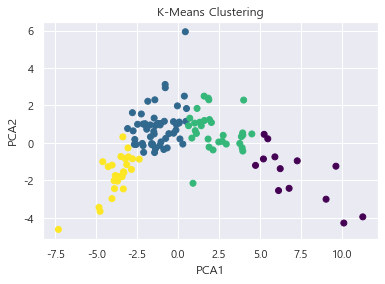

In [223]:
# 원래 데이터와 클러스터 중심을 그래프로 그리기
plt.scatter(transformed_df[:, 0], transformed_df[:, 1], c=cluster_labels, cmap = 'viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering')
plt.show()

In [224]:
df['cluster'] = cluster_labels

In [225]:
#군집별 데이터 확인
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]

In [226]:
df0

,행정구역,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
0,세종특별자치시,385346,160033,2.41,91936,80012,2.078651,2.127958,5.6,5.6,...,2.2,2.4,1.349437,1.375387,143798,150278,1.166472,1.28,1.12,0
2,원주시,359513,168985,2.13,72688,68342,3.218242,3.326723,13.6,15.0,...,1.7,1.8,1.418586,1.418586,143538,146861,0.663052,0.94,0.94,0
19,청주시,847776,394682,2.15,151803,148974,1.278640,1.269203,12.6,12.6,...,1.7,1.8,1.108783,1.108783,308987,314788,0.796848,0.94,0.86,0
30,천안시,656537,304443,2.16,127244,127690,1.696782,1.725721,14.3,15.0,...,1.9,2.1,1.172820,1.203283,245351,248378,1.037687,0.94,0.84,0
33,아산시,335956,153429,2.19,70788,57937,3.241496,3.187917,10.7,10.5,...,1.3,1.3,1.398993,1.428759,130041,136936,0.813483,0.90,0.91,0
45,전주시,644410,295290,2.18,112148,120639,1.800096,1.800096,26.0,25.6,...,3.1,3.2,1.163855,1.163855,243306,246860,0.711710,0.79,0.73,0
81,포항시,492044,231749,2.12,67287,74911,2.367674,2.398160,19.6,19.8,...,1.5,1.6,1.341343,1.341343,201687,202515,0.445577,0.88,0.89,0
85,구미시,405408,185423,2.19,61682,67359,2.772516,2.804582,9.3,9.2,...,2.0,2.1,1.282658,1.282658,152482,152734,1.021711,0.87,0.82,0
104,창원시,1010470,453547,2.23,141002,155146,1.093551,1.101468,19.9,20.1,...,1.9,2.0,1.108395,1.108395,368075,367588,0.596969,0.89,0.82,0
105,진주시,341743,159298,2.15,53523,56564,3.435330,3.479223,19.3,19.1,...,2.5,2.6,1.346041,1.346041,131224,131902,0.561610,0.91,0.94,0


In [227]:
df0.describe()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
count,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,5.272704e+05,239568.923077,2.207692,89404.538462,90213.923077,2.424935,2.449858,15.561538,15.746154,5.838462,...,1.953846,2.069231,1.256781,1.265585,198082.846154,200963.153846,0.765756,0.936923,0.881538,0.0
std,2.108595e+05,96869.298766,0.082073,33477.016787,35650.274535,0.796989,0.803148,6.103897,6.049327,2.796587,...,0.461186,0.481983,0.122449,0.123568,74637.463441,74239.473048,0.205507,0.113165,0.093617,0.0
min,3.359560e+05,153429.000000,2.120000,51142.000000,51124.000000,1.093551,1.101468,5.600000,5.600000,3.100000,...,1.300000,1.300000,1.108395,1.108395,130041.000000,131902.000000,0.445577,0.790000,0.730000,0.0
25%,3.595130e+05,160033.000000,2.150000,67287.000000,67359.000000,1.800096,1.800096,10.700000,10.500000,4.300000,...,1.700000,1.800000,1.130585,1.158850,143538.000000,146861.000000,0.647988,0.890000,0.820000,0.0
50%,4.899260e+05,221969.000000,2.190000,72688.000000,75815.000000,2.367674,2.398160,14.300000,15.000000,5.900000,...,1.900000,2.000000,1.282658,1.282658,175552.000000,177771.000000,0.711710,0.910000,0.860000,0.0
75%,6.444100e+05,295290.000000,2.230000,112148.000000,120639.000000,3.218242,3.187917,19.900000,20.100000,6.100000,...,2.100000,2.300000,1.349437,1.375387,243306.000000,246860.000000,0.813483,0.940000,0.930000,0.0
max,1.010470e+06,453547.000000,2.410000,151803.000000,155146.000000,3.435330,3.479223,26.000000,25.600000,14.400000,...,3.100000,3.200000,1.418586,1.428759,368075.000000,367588.000000,1.166472,1.280000,1.120000,0.0


In [228]:
df1.describe()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,55720.833333,29875.037037,1.853519,7703.407407,7556.777778,26.415846,28.078108,18.451852,18.724074,15.314815,...,0.933333,0.948148,3.215858,3.192851,26543.148148,26776.407407,0.193555,1.010926,0.965185,1.0
std,21622.330542,10978.828614,0.083353,3876.389282,3764.416052,9.255881,9.897295,11.303794,11.396407,4.350121,...,0.299055,0.298891,0.728553,0.703319,9600.846037,9678.683652,0.071268,0.227623,0.215229,0.0
min,24418.000000,13400.000000,1.700000,3373.000000,3204.000000,12.339022,13.129870,4.100000,4.200000,6.000000,...,0.300000,0.300000,1.074345,1.074345,11948.000000,12046.000000,0.101479,0.540000,0.540000,1.0
25%,41429.500000,22861.500000,1.790000,5163.250000,5037.500000,19.300850,20.474109,10.750000,10.350000,12.675000,...,0.800000,0.725000,2.783475,2.783475,19479.500000,19638.000000,0.147783,0.870000,0.840000,1.0
50%,49850.000000,27078.000000,1.860000,6452.500000,6435.500000,25.624572,26.935140,17.800000,18.350000,14.550000,...,0.900000,0.900000,3.084976,3.084976,24388.000000,24492.000000,0.171429,0.955000,0.945000,1.0
75%,62723.500000,34327.500000,1.920000,8080.000000,8207.000000,32.154016,34.047362,22.675000,22.300000,17.675000,...,1.100000,1.100000,3.770737,3.609598,30436.750000,30845.250000,0.231362,1.137500,1.047500,1.0
max,111273.000000,57811.000000,2.030000,18174.000000,17125.000000,50.372676,52.461299,68.200000,67.500000,27.200000,...,1.700000,1.700000,5.048152,4.659832,48915.000000,48963.000000,0.498547,1.870000,1.800000,1.0


In [229]:
df2.describe()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,164307.387097,79215.838710,2.068387,27636.290323,27670.838710,8.999402,9.270435,16.722581,16.696774,9.951613,...,1.564516,1.651613,1.817848,1.821157,70338.806452,71260.516129,0.438008,0.966129,0.929355,2.0
std,72282.544467,33564.125915,0.102570,12783.286031,13194.963135,4.068096,4.183335,7.785787,7.883632,5.693146,...,0.328175,0.328503,0.368426,0.368519,29585.298468,30032.883304,0.128118,0.133033,0.119804,0.0
min,45479.000000,18716.000000,1.910000,13270.000000,12096.000000,3.861152,3.814117,2.900000,3.000000,5.000000,...,0.900000,1.000000,1.099409,1.099409,17156.000000,18660.000000,0.205883,0.700000,0.720000,2.0
25%,101205.000000,52349.500000,2.000000,16035.000000,15333.000000,5.622421,5.771214,11.700000,11.550000,7.200000,...,1.350000,1.400000,1.651329,1.651329,43723.000000,43746.000000,0.342902,0.895000,0.870000,2.0
50%,151796.000000,69202.000000,2.060000,22538.000000,21794.000000,8.023927,8.307202,16.300000,16.000000,8.600000,...,1.500000,1.600000,1.751089,1.757228,64442.000000,66448.000000,0.429785,0.960000,0.910000,2.0
75%,224136.500000,103484.000000,2.105000,36883.000000,38123.500000,12.578184,13.061721,19.950000,19.900000,10.650000,...,1.800000,1.800000,2.004606,2.004606,97980.000000,98613.500000,0.508728,1.045000,0.995000,2.0
max,285858.000000,134480.000000,2.430000,59062.000000,55241.000000,16.513116,17.146476,34.800000,34.600000,35.100000,...,2.300000,2.500000,3.038590,3.038590,118515.000000,119129.000000,0.736941,1.230000,1.210000,2.0


In [230]:
df3.describe()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.00000,26.000000,26.0
mean,28346.307692,15744.846154,1.798846,3853.846154,3738.461538,53.588076,57.448443,6.919231,6.946154,30.634615,...,0.573077,0.565385,4.302689,4.302689,13592.807692,13656.961538,0.179399,1.11000,1.030769,3.0
std,7851.734380,4355.646071,0.077062,1085.982677,1069.991934,26.159684,28.144577,5.554243,5.847887,13.250870,...,0.206993,0.201876,0.772776,0.772776,4185.269368,4221.888236,0.073020,0.28195,0.264891,0.0
min,9043.000000,5519.000000,1.640000,1644.000000,1691.000000,27.021856,28.510077,0.000000,0.000000,12.700000,...,0.100000,0.100000,2.984481,2.984481,3025.000000,3016.000000,0.094006,0.80000,0.640000,3.0
25%,23541.750000,13581.250000,1.752500,3122.500000,3022.750000,40.502948,43.885882,2.550000,2.950000,24.150000,...,0.400000,0.425000,3.791515,3.791515,11067.500000,11094.500000,0.144085,0.87250,0.835000,3.0
50%,27687.000000,15232.000000,1.785000,3942.000000,3726.500000,50.356120,54.333561,6.550000,6.450000,28.550000,...,0.600000,0.550000,4.353350,4.353350,13477.000000,13583.000000,0.162564,1.05000,0.990000,3.0
75%,32679.250000,18065.250000,1.830000,4707.750000,4480.250000,58.339110,62.099987,9.050000,8.450000,31.950000,...,0.775000,0.700000,4.696429,4.696429,16234.000000,16258.000000,0.182176,1.29250,1.205000,3.0
max,47036.000000,25640.000000,2.000000,5917.000000,5855.000000,170.408050,183.346235,23.800000,26.600000,72.400000,...,0.900000,0.900000,5.726502,5.726502,22098.000000,22390.000000,0.375498,1.80000,1.560000,3.0


In [233]:
#0>2>1>3

df0.to_csv('C:/Users/user/Desktop/데분/소도시.csv', index=False, encoding='cp949')
df1.to_csv('C:/Users/user/Desktop/데분/좆좆소도시.csv',index=False, encoding='cp949')
df2.to_csv('C:/Users/user/Desktop/데분/좆소도시.csv',index=False, encoding='cp949')
df3.to_csv('C:/Users/user/Desktop/데분/좆좆좆소도시.csv',index=False, encoding='cp949')